<a href="https://colab.research.google.com/github/nandita992/Predicting-Short-Antimicrobial-Peptides-in-disease-or-control-group/blob/main/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Installing Conda & installing python 3.7
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-08-20 11:16:45--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   124MB/s    in 0.7s    

2022-08-20 11:16:46 (124 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-p

P-Features : help us compute the properties of the amino acids which will be crucial for quanitfying the molecular properties of peptides. 

Peptides : are short streches of amino acids chanins. This means that there are several amino acids which are linked together through a chain. Such chains can range from two (which is a di-peptide meaning ther are two amino acids) or it can go as big as 50 or more which is a t-peptide. 

Thus in this research, we are going to focus on short peptides that has anti-microbial activity. Thus the p-feature library in python will allow us to compute the molecular properties which we will be using as the features and serve as the basis for the construction of machine learning model. 

In [2]:
# Download p-features

! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2022-08-20 11:17:00--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2022-08-20 11:17:00--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519460 (507K) [application/zip]
Saving to: ‘Pfeature.zip.2’

Pfeature.zip.2      100%[===================>] 507.29K  --.-KB/s    in 0.04s   

2022-08-20 11:17:01 (12.4 MB/s) - ‘Pfeature.zip.2’ saved [519460/519460]



In [3]:
# Go into the p-feature folder 
%cd Pfeature

/content/Pfeature


In [4]:
# Install it
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
error: can't copy 'Pfeature/ONTAINER-LICENSE': doesn't exist or not a regular file


Install C-D hit library

C-D Hit library helps us to filter out any redundancy in the peptide sequence. This means that peptides which are very much simillar will be removed. Thus we wil get a non-redundant or unique set of peptides which will be used for model building. 

We also used conda to install C-D Hit

In [5]:
! conda install -c bioconda cd-hit -y

Solving environment: | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2022.07.19-h06a4308_0
  certifi                                 2019.11.28-py37_0 --> 2022.6.15-py37h06a4308_0
  conda                                        4.8.2-py37_0 --> 4.13.0-py37h06a4308_0
  openssl                                 1.1.1d-h7b6447c_4 --> 1.1.1q-h7f8727e_0


Preparing transaction: \ done
Verifying transaction: / - \ done
Executing transaction: / - \ done


Load Peptide Dataset

Dataset was taken from a research paper : Deep-AMPEP30 : Improve short Antimicrobial Peptides prediction with Deep Learning

Fasta is a type of file which as ascii text file that contains several rows of peptide sequence. 

M : Methylene
S : Serine 
G : Glycine
I : Isolyceine
A : Alanine
R : Arginine
P : Proline

** Link for Amino acid acronym

In [6]:
# Also available in cbbio.online -- Need to download from there. 
## Positive data set means there is an Antimicrobial actity
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta

--2022-08-20 11:17:12--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta.2’

train_po.fasta.2    100%[===================>]  51.39K  --.-KB/s    in 0.01s   

2022-08-20 11:17:12 (4.70 MB/s) - ‘train_po.fasta.2’ saved [52619/52619]



#### What is negative dataset?


In [7]:
## Negative data set means there is no Antimicrobial activity
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta

--2022-08-20 11:17:13--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta.2’

train_ne.fasta.2    100%[===================>]  55.87K  --.-KB/s    in 0.01s   

2022-08-20 11:17:13 (5.13 MB/s) - ‘train_ne.fasta.2’ saved [57206/57206]



In [8]:
## Each peptide begins with a identification number
! cat train_ne.fasta

>nonamp5_30_1
FPPWE
>nonamp5_30_2
FPPWM
>nonamp5_30_3
IEFFT
>nonamp5_30_4
RYLPT
>nonamp5_30_5
EDRTY
>nonamp5_30_6
FPPWVL
>nonamp5_30_7
GAPMFV
>nonamp5_30_8
KPPWRL
>nonamp5_30_9
NPTNLH
>nonamp5_30_10
DTVNAA
>nonamp5_30_11
MERQVL
>nonamp5_30_12
PIDPGV
>nonamp5_30_13
KPLWRL
>nonamp5_30_14
FGVLNFF
>nonamp5_30_15
GSEIQPR
>nonamp5_30_16
NNLDEIK
>nonamp5_30_17
VPPIGWF
>nonamp5_30_18
EAYAFGL
>nonamp5_30_19
TNDFMRF
>nonamp5_30_20
VIYIFAR
>nonamp5_30_21
DYMGWMDF
>nonamp5_30_22
GCVLLPWC
>nonamp5_30_23
MEDEGAGG
>nonamp5_30_24
SVQFKPRL
>nonamp5_30_25
DEVKIVLD
>nonamp5_30_26
SPPFAPRL
>nonamp5_30_27
TGVAWRIT
>nonamp5_30_28
PTHIKWGD
>nonamp5_30_29
MWPFPSDK
>nonamp5_30_30
EPFKISIHL
>nonamp5_30_31
GPDSSFLRL
>nonamp5_30_32
MAQDAITAV
>nonamp5_30_33
TLTSFGEWR
>nonamp5_30_34
CYIQNCPRG
>nonamp5_30_35
SQPSMRLRF
>nonamp5_30_36
TPTAFYGVR
>nonamp5_30_37
NPQQDFMRF
>nonamp5_30_38
MYKLLIINP
>nonamp5_30_39
AGQDGFMRF
>nonamp5_30_40
YDRYEVVYR
>nonamp5_30_41
CLIQDCPEG
>nonamp5_30_42
NQEGLFHGR
>nonamp5_30_43
GLVPPADKY
>

Removing Redundant sequence from the sequence using CD-HIT library of peptides having great similarity of more than 0.99. We can set the threshold to lower number. 

In [9]:
# Total of 1445 sequences
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Sat Aug 20 11:17:13 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485873

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.10


In [10]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Sat Aug 20 11:17:13 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.10


In [11]:
! ls -l

total 5480
drwxr-xr-x 3 root root    4096 Jul 28 08:29 build
-rw-r--r-- 1 root root   86079 Sep 29  2020 Functions_Tables.pdf
drwxr-xr-x 3 root root    4096 Aug 20 10:40 Pfeature
-rw-r--r-- 1 root root  221146 Sep 29  2020 Pfeature_Descriptors.pdf
-rw-r--r-- 1 root root     971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root    1265 Sep 29  2020 README
-rw-r--r-- 1 root root    1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root  130978 Aug 20 11:04 train_ne_cdhit.aac.csv
-rw-r--r-- 1 root root 2301040 Aug 20 11:08 train_ne_cdhit.dpc.csv
-rw-r--r-- 1 root root   54341 Aug 20 11:17 train_ne_cdhit.txt
-rw-r--r-- 1 root root   61425 Aug 20 11:17 train_ne_cdhit.txt.clstr
-rw-r--r-- 1 root root   57206 Aug 20 10:39 train_ne.fasta
-rw-r--r-- 1 root root   57206 Aug 20 11:04 train_ne.fasta.1
-rw-r--r-- 1 root root   57206 Aug 20 11:17 train_ne.fasta.2
-rw-r--r-- 1 root root  122465 Aug 20 11:04 train_po_cdhit.aac.csv
-rw-r--r-- 1 root root 2163384 Aug 20 11:06 train_po_cdhit.dpc.csv
-rw-r--r-- 1 r

In [12]:
# we are using a bash command to see the number of seqeunces or number of line -- positive dataset
! grep ">" train_po_cdhit.txt | wc -l

1337


In [13]:
# Total orignal lines -- positive dataset
! grep ">" train_po.fasta | wc -l

1529


In [14]:
# Total original lines -- negative dataset
! grep ">" train_ne.fasta | wc -l

1529


In [15]:
# After CD-hit clearing, how many sequences are left
! grep ">" train_ne_cdhit.txt | wc -l

1422


Calculate the P-features

# Download the p-features acronyms

https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf

In [16]:
# For the simplicity of this research and pipeline implementation, we will only implement two p-features : 
import pandas as pd

Amino Acid Composition represents to percent composition of each of the twenty amino acids containning inside peptide sequence. 

For example : MLRYLSLFAVGLATGYAWGWIDGLAASLTV                                                We will count how many mythyline is in the peptides or how many M are there in the sequence. Thus, we have 1 methyline in 1/30 == 3.3%

Thus in the table below, AAC_A means how many times A is present in the whole peptide sequence for that particular seqeunce. 

In [17]:
# Amino acid composition (AAC)
# aac_wp - whole protein
# a means the starting and c means at the pend, p means we are computing for the whole sequence

## We will take the input as the file, strip the .txt and change the file name + aac.csv. We will then parse this file through the p-feature function 
## and get the output.

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('train_po_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [18]:
# Calculate it for both positive and negative dataset
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0) # because we want to concat them on top of each other
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1) # axis=1 because we want to combine the class and features side by side.
  return df

feature = feature_calc(pos, neg, aac) # AAC
#feature = feature_calc(pos, neg, dpc) # DPC
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


Let's do the same for di-peptide


In [19]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('train_po_cdhit.txt')
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.00,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,3.45,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,0.00,0.0,0.0,3.45,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,6.90,...,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,3.45,3.45,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Concat them on top of each other
feature = feature_calc(pos, neg, dpc) # DPC
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY,class
0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1418,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1419,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,...,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
1420,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative


# **Data Pre-processing**

In [21]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()

In [22]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [23]:
X.shape

(2759, 400)

In [24]:
# Feature selection (Variance threshold)
#Removing the low variance from the data
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YY
0,0.0,0.0,0.0,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.9,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,3.45,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,3.45,0.00,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1419,0.0,0.0,0.0,0.0,0.0,3.45,0.0,0.0,0.00,3.45,...,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,3.45,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

Compare the predictions in more than 30+ Algorithms

In [26]:
! pip install lazypredict

In [39]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('class', axis=1)
y = feature['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 43/43 [00:00<00:00, 203561.03it/s]


In [40]:
# Prints the model performance (Training set)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
GaussianProcessClassifier,0.93,0.93,None,0.93,0.86,33.70
RandomForestClassifier,0.93,0.93,None,0.93,0.86,1.21
MLPClassifier,0.93,0.93,None,0.93,0.86,5.81
RadiusNeighborsClassifier,0.93,0.93,None,0.93,0.87,0.35
DecisionTreeClassifier,0.93,0.93,None,0.93,0.87,0.25
LabelSpreading,0.93,0.93,None,0.93,0.87,0.84
ExtraTreeClassifier,0.93,0.93,None,0.93,0.87,0.11
ExtraTreesClassifier,0.93,0.93,None,0.93,0.87,1.36
LabelPropagation,0.93,0.93,None,0.93,0.87,0.73


In [42]:
# Prints the model performance (Test set)

predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,


[(0.0, 1.0)]

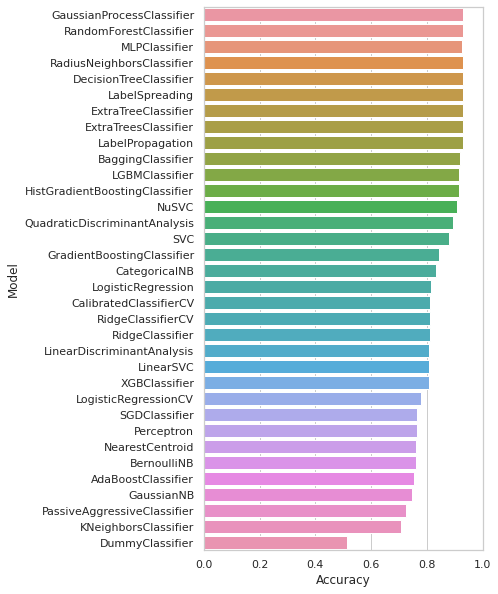

In [43]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

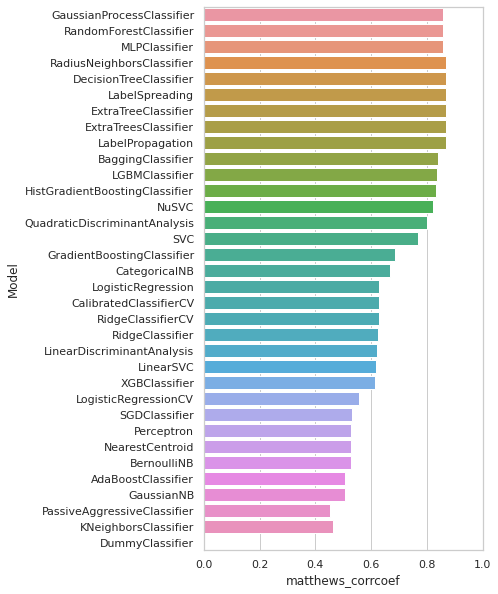

In [44]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

# **Build a Random Forest**

In [45]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

# **Apply the model to make predictions**

In [46]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# **Model Performance**

In [47]:
feature['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [48]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.6793478260869565

In [49]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.6793478260869565

In [50]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.3588865097870851

In [51]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[192,  93],
       [ 84, 183]])

In [52]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

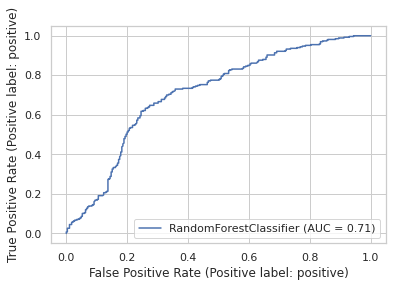

In [53]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

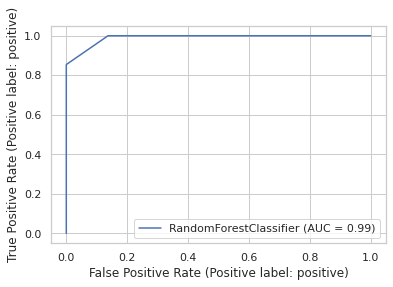

In [54]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

# **Feature Importance**

In [55]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YY
0,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1418,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,3.45,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1419,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,3.45,...,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1420,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [56]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [57]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,DPC1_AA,0.01
1,DPC1_AC,0.00
2,DPC1_AD,0.01
3,DPC1_AE,0.00
4,DPC1_AF,0.00
...,...,...
395,DPC1_YY,0.00
396,NaN,0.00
397,NaN,0.00
398,NaN,0.00


Text(0.5, 0, 'Feature Importance')

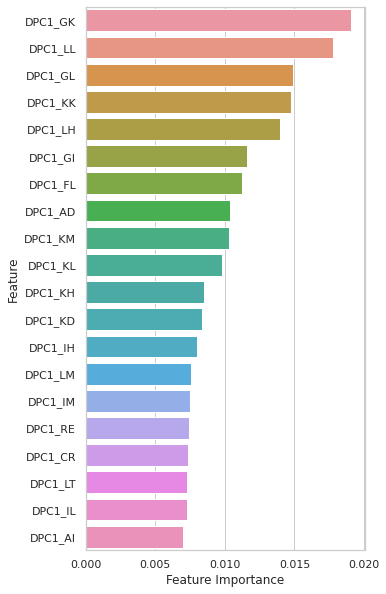

In [58]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")